In [1]:
#https://github.com/sdimi/average-word2vec
import gensim
from gensim import utils
import numpy as np
import sys
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk import download
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
import matplotlib.colors as mplc
%store -r newsgroup
colormap = np.array([
    "#f44b42", "#f4e241", "#a3f441", "#41f4be", "#4182f4",
    "#a341f4"])

In [3]:
#model Google News, run once to download pre-trained vectors
#!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [5]:
download('punkt') #tokenizer, run once
download('stopwords') #stopwords dictionary, run once
stop_words = stopwords.words('english')

def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] #restricts string to alphabetic characters only
    return doc

[nltk_data] Downloading package punkt to /Users/jmulhern/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jmulhern/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
############  doc content  -> num label     -> string label
#note to self: texts[XXXX] -> y[XXXX] = ZZZ -> ng20.target_names[ZZZ]

# Fetch ng20 dataset
ng20 = newsgroup

# text and ground truth labels
texts, y = ng20.data, ng20.target

corpus = [preprocess(text) for text in texts]

In [7]:
#remove empty docs
def filter_docs(corpus, texts, labels, condition_on_doc):
    """
    Filter corpus, texts and labels given the function condition_on_doc which takes
    a doc.
    The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    labels = [i for (i, doc) in zip(labels, corpus) if condition_on_doc(doc)]
    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts, labels)

In [8]:
corpus, texts, y = filter_docs(corpus, texts, y, lambda doc: (len(doc) != 0))

555 docs removed


In [9]:
#remove words not in model dict
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.vocab]
    return np.mean(word2vec_model[doc], axis=0)

In [10]:
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)

In [11]:
corpus, texts, y = filter_docs(corpus, texts, y, lambda doc: has_vector_representation(model, doc))

9 docs removed


In [12]:
x =[]
for doc in corpus: #look up each doc in model
    x.append(document_vector(model, doc))

In [13]:
X = np.array(x) #list to array

In [14]:

# np.save('documents_vectors.npy', X)  #np.savetxt('documents_vectors.txt', X)
# np.save('labels.npy', y)             #np.savetxt('labels.txt', y)
# np.savetxt('documents_vectors.txt', X)
# np.savetxt('labels.txt', y)

In [15]:

X.shape, len(y)

((18282, 300), 18282)

In [16]:
texts[464]

"Sorry, Bill, I had to clear this up. There may be good evolutionary\narguments against homosexuality, but these don't qualify.\n\n[deletions]\n[deletions]\n\n Oh? I guess all those social insects (e.g. ants, bees, etc.) which\nhave one breeding queen and a whole passel of sterile workers are on\nthe way out, huh?\n \n\n I refer you to the bonobos, a species of primate as closeley related to\nhumans as chimpanzees (that is, very closely). They have sex all the\ntime, homosexual as well as heterosexual. When the group finds food, they\nhave sex. Before the go to sleep at night, they have sex. After they\nescape from or fight off prdators, they have sex. Sex serves a very important\nsocial function above and beyond reproduction in this species. A species\nclosely related to humans. There is some indication that sex performs\na social function in humans, as well, but even if not, this shows that\nsuch a function is not *impossible*.\n\n Sincerely,\n\n Ray Ingles               ingles@engin

In [19]:
y[464]

5

In [20]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

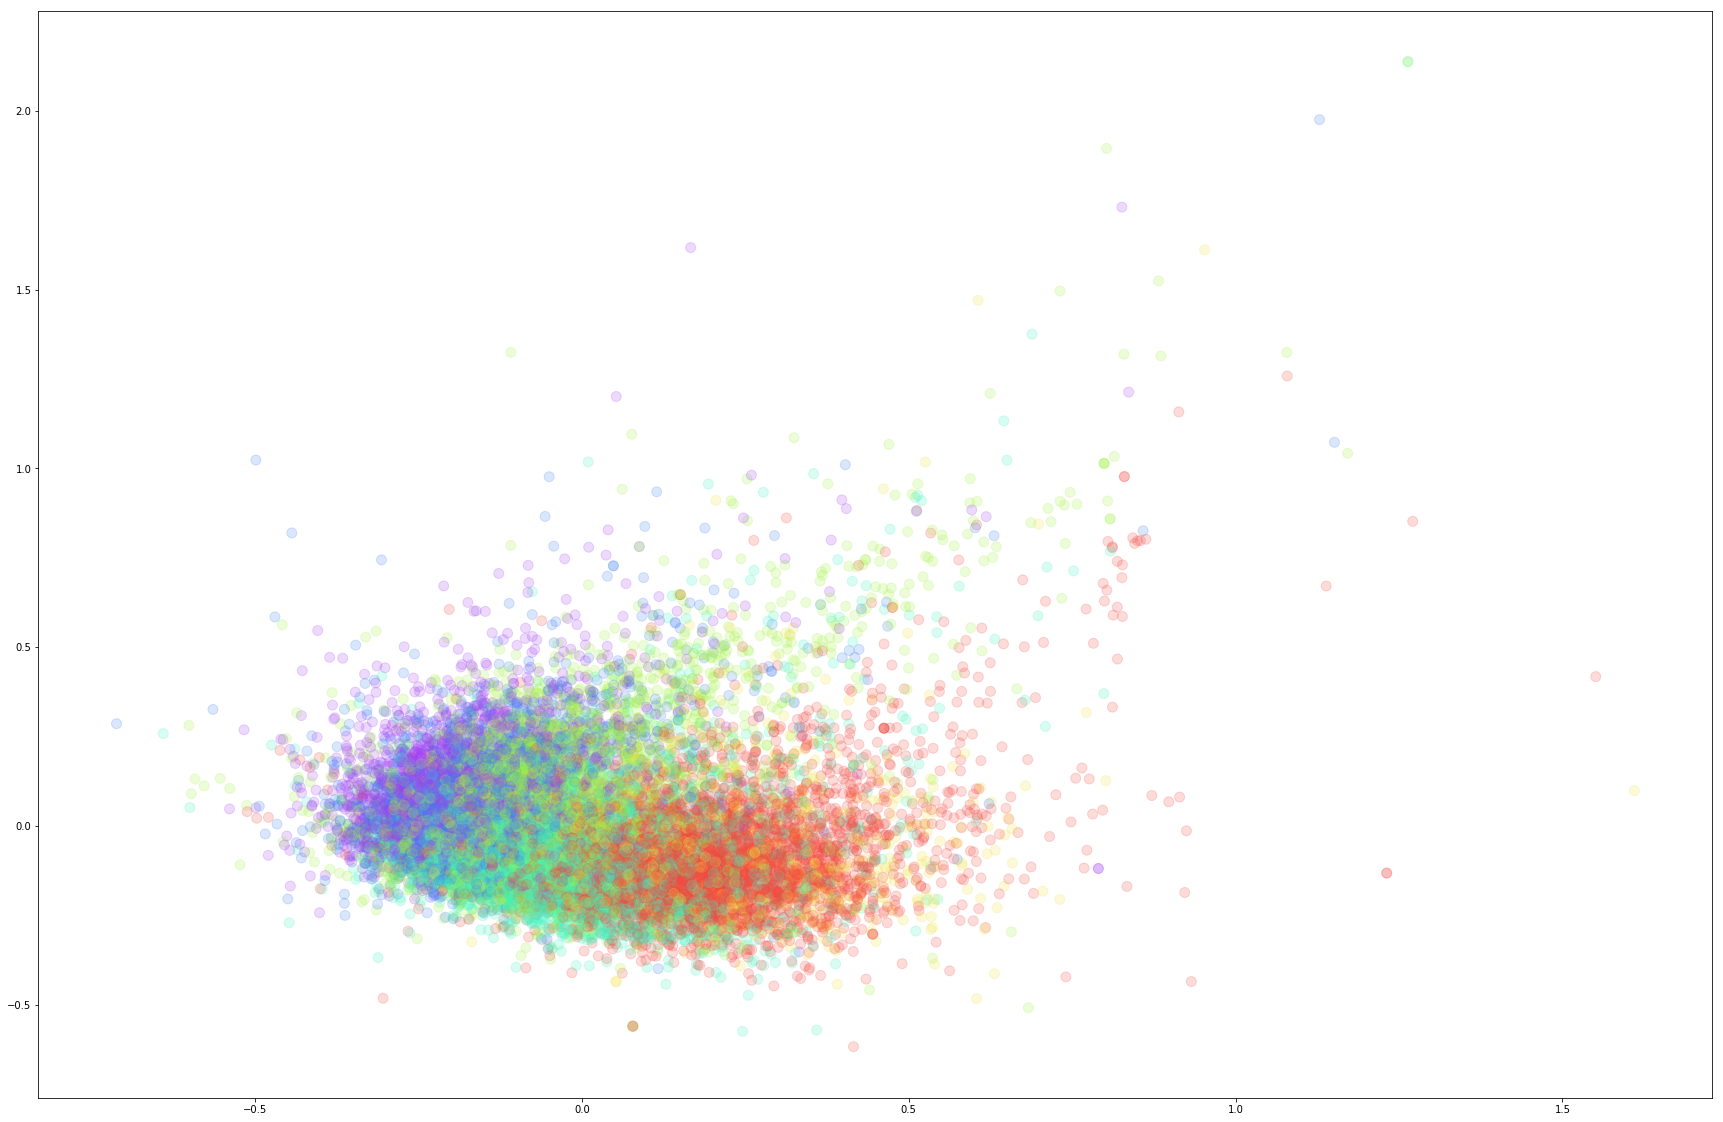

In [21]:
plt.figure(1, figsize=(30, 20),)
plt.scatter(x_pca[:, 0], x_pca[:, 1],s=100, c=y, alpha=0.2,cmap=mplc.ListedColormap(colormap))

In [22]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18282 samples in 0.275s...
[t-SNE] Computed neighbors for 18282 samples in 182.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18282
[t-SNE] Computed conditional probabilities for sample 2000 / 18282
[t-SNE] Computed conditional probabilities for sample 3000 / 18282
[t-SNE] Computed conditional probabilities for sample 4000 / 18282
[t-SNE] Computed conditional probabilities for sample 5000 / 18282
[t-SNE] Computed conditional probabilities for sample 6000 / 18282
[t-SNE] Computed conditional probabilities for sample 7000 / 18282
[t-SNE] Computed conditional probabilities for sample 8000 / 18282
[t-SNE] Computed conditional probabilities for sample 9000 / 18282
[t-SNE] Computed conditional probabilities for sample 10000 / 18282
[t-SNE] Computed conditional probabilities for sample 11000 / 18282
[t-SNE] Computed conditional probabilities for sample 12000 / 18282
[t-SNE] Computed conditional probabilities for s

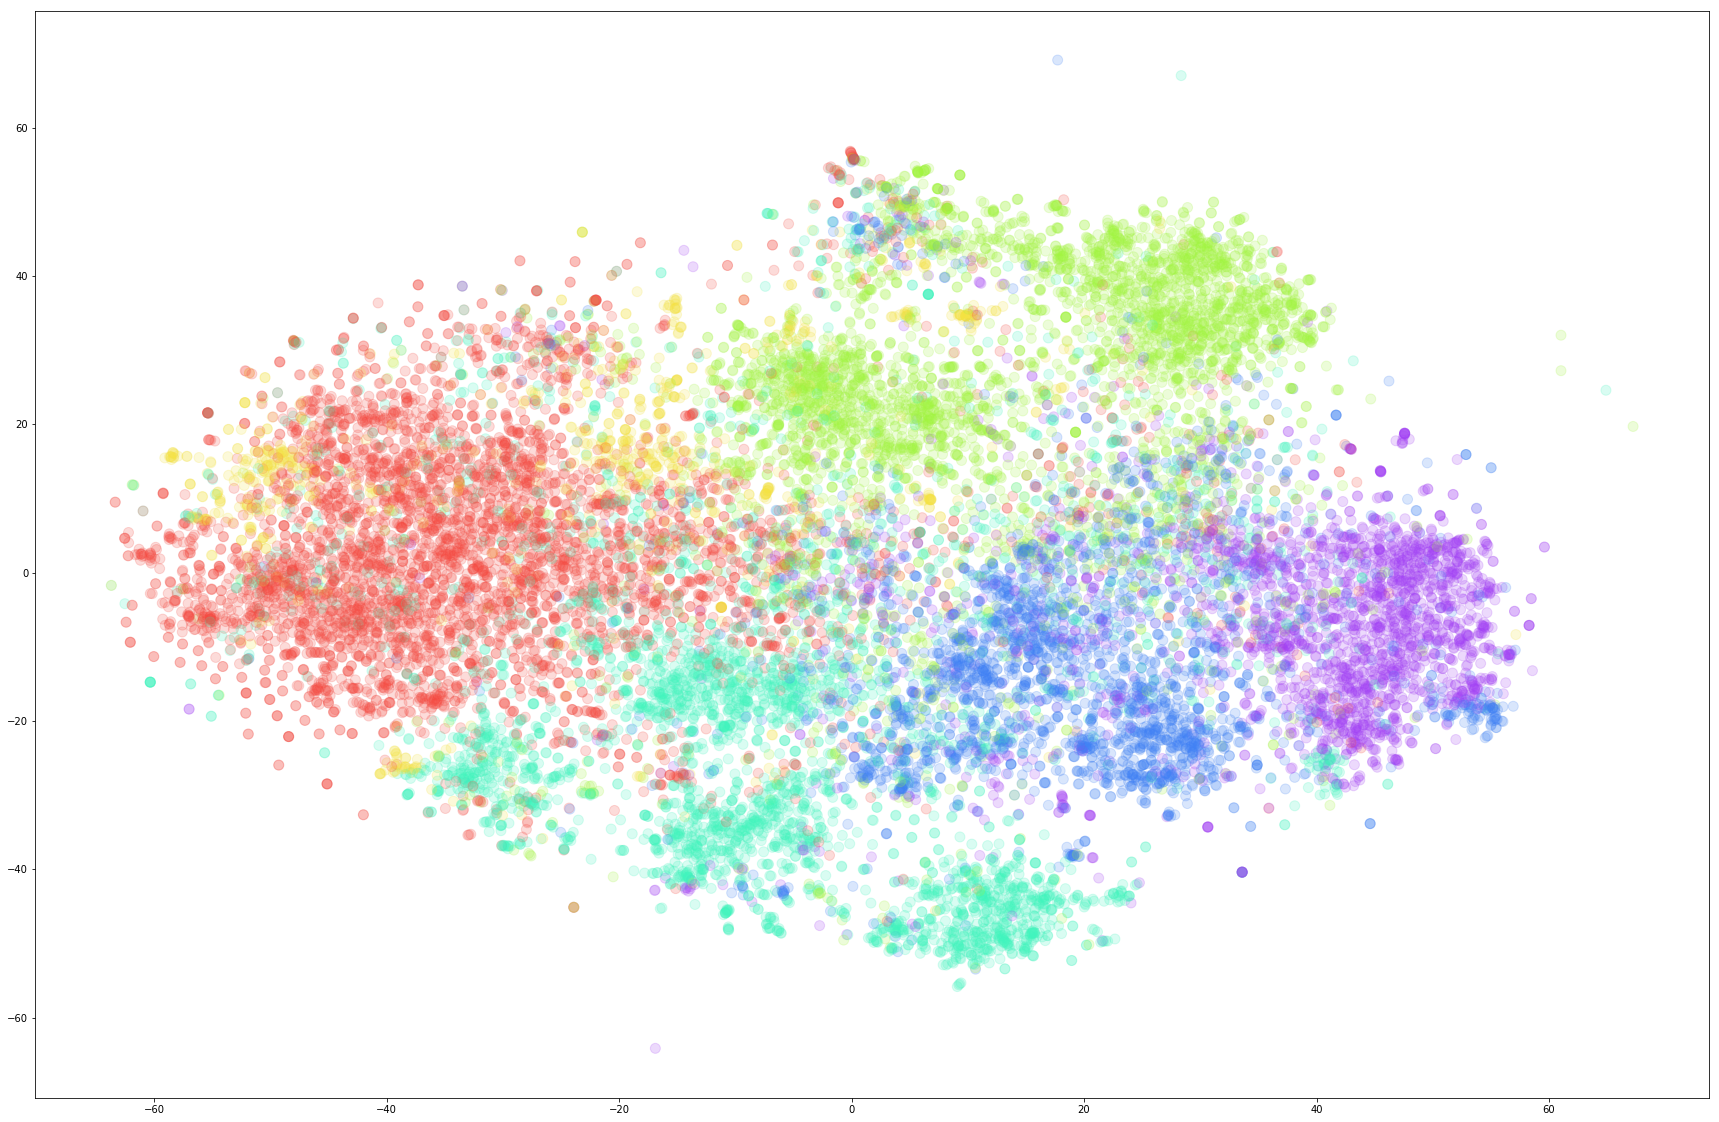

In [23]:
plt.figure(1, figsize=(30, 20),)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=100, c=y, alpha=0.2,cmap=mplc.ListedColormap(colormap))

In [24]:
#KMEANS TIME for doc2vec w many words
from sklearn.cluster import KMeans

In [25]:
X_doc2vec = np.column_stack((X_tsne[:, 0],X_tsne[:, 1]))

In [26]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_doc2vec)

In [27]:
kMeanCentersD2V = kmeans.cluster_centers_

In [28]:
kMeanCentersD2V

array([[-17.25092  , -22.295515 ],
       [ 20.66907  ,  36.50998  ],
       [-40.41207  ,   4.962947 ],
       [ 13.691892 , -26.71004  ],
       [ -6.0742993,  15.37718  ],
       [ 37.644806 ,  -4.602579 ]], dtype=float32)

In [29]:
kMeanCentersD2V[:, 0]

array([-17.25092  ,  20.66907  , -40.41207  ,  13.691892 ,  -6.0742993,
        37.644806 ], dtype=float32)

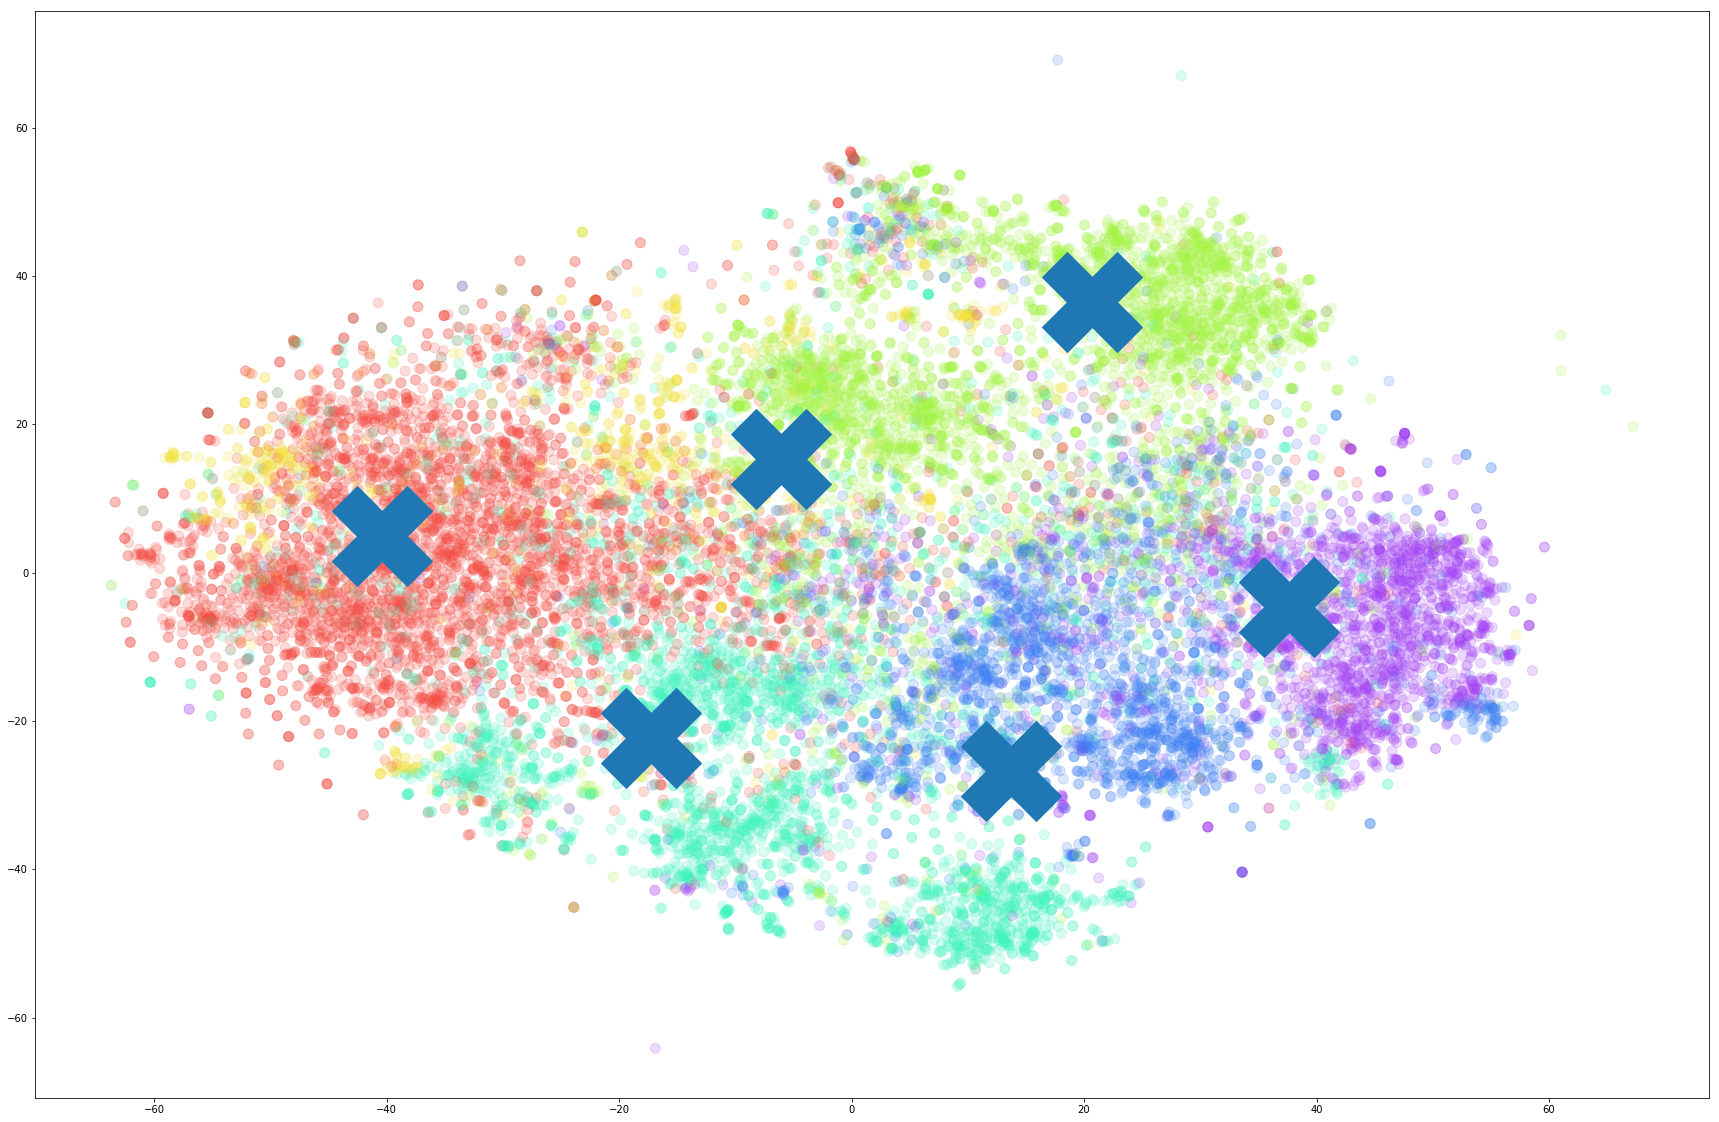

In [30]:
plt.figure(2, figsize=(30, 20),)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],s=100, c=y, alpha=0.2,cmap=mplc.ListedColormap(colormap))
plt.scatter(kMeanCentersD2V[:, 0],kMeanCentersD2V[:, 1],marker='X',s=10000)

In [31]:
pca.explained_variance_

array([0.04514662, 0.03835024], dtype=float32)

In [32]:
y


[2,
 0,
 4,
 0,
 0,
 3,
 0,
 2,
 2,
 5,
 5,
 3,
 5,
 3,
 5,
 4,
 3,
 3,
 3,
 2,
 2,
 0,
 0,
 2,
 2,
 3,
 4,
 0,
 1,
 5,
 2,
 4,
 0,
 2,
 3,
 0,
 0,
 4,
 2,
 2,
 5,
 0,
 3,
 2,
 2,
 0,
 0,
 1,
 3,
 0,
 3,
 2,
 4,
 3,
 2,
 2,
 5,
 0,
 5,
 2,
 2,
 0,
 0,
 0,
 4,
 3,
 2,
 3,
 0,
 0,
 0,
 4,
 1,
 3,
 5,
 3,
 2,
 0,
 5,
 2,
 3,
 2,
 0,
 3,
 0,
 5,
 4,
 3,
 2,
 5,
 2,
 5,
 0,
 4,
 0,
 0,
 2,
 4,
 0,
 4,
 0,
 0,
 4,
 2,
 0,
 4,
 1,
 0,
 0,
 2,
 3,
 0,
 4,
 4,
 3,
 3,
 2,
 0,
 0,
 3,
 0,
 3,
 4,
 0,
 0,
 3,
 0,
 4,
 5,
 4,
 2,
 0,
 0,
 3,
 0,
 2,
 5,
 0,
 2,
 0,
 3,
 3,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 4,
 0,
 2,
 4,
 3,
 0,
 0,
 3,
 5,
 0,
 0,
 5,
 3,
 0,
 3,
 0,
 3,
 0,
 5,
 0,
 0,
 2,
 5,
 2,
 2,
 2,
 2,
 4,
 3,
 0,
 4,
 4,
 4,
 5,
 1,
 5,
 5,
 5,
 4,
 1,
 3,
 0,
 5,
 0,
 5,
 0,
 0,
 2,
 1,
 5,
 3,
 5,
 2,
 0,
 0,
 0,
 2,
 4,
 0,
 4,
 3,
 2,
 5,
 0,
 2,
 3,
 5,
 3,
 2,
 2,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 5,
 2,
 2,
 0,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 5,
 5,
 0,
 3,
 0,
 0,
 4,
 0,
 3,
 4,
 0,
 0,


In [33]:
len(y)

18282

In [34]:
from sklearn.metrics import normalized_mutual_info_score

In [35]:
a = kmeans.predict(X_doc2vec)

In [36]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.3831971220563419

In [37]:
#(labels_true, labels_pred, average_method=’warn’)[source]

In [38]:
X_doc2vec

array([[ 29.78113  ,  39.247585 ],
       [-29.851131 ,  17.173449 ],
       [ 20.749006 , -19.292463 ],
       ...,
       [-44.99279  ,  14.895201 ],
       [ 40.028114 , -20.180721 ],
       [ -3.5677202,  18.335634 ]], dtype=float32)

In [ ]:
#Now try 3D

In [40]:
X.shape

(18282, 300)

In [41]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X)

In [42]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=3, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18282 samples in 0.222s...
[t-SNE] Computed neighbors for 18282 samples in 203.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18282
[t-SNE] Computed conditional probabilities for sample 2000 / 18282
[t-SNE] Computed conditional probabilities for sample 3000 / 18282
[t-SNE] Computed conditional probabilities for sample 4000 / 18282
[t-SNE] Computed conditional probabilities for sample 5000 / 18282
[t-SNE] Computed conditional probabilities for sample 6000 / 18282
[t-SNE] Computed conditional probabilities for sample 7000 / 18282
[t-SNE] Computed conditional probabilities for sample 8000 / 18282
[t-SNE] Computed conditional probabilities for sample 9000 / 18282
[t-SNE] Computed conditional probabilities for sample 10000 / 18282
[t-SNE] Computed conditional probabilities for sample 11000 / 18282
[t-SNE] Computed conditional probabilities for sample 12000 / 18282
[t-SNE] Computed conditional probabilities for s

In [44]:
X_doc2vec = np.column_stack((X_tsne[:, 0],X_tsne[:, 1],(X_tsne[:, 2])))

In [45]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_doc2vec)

In [46]:
kMeanCentersD2V = kmeans.cluster_centers_

In [47]:
kMeanCentersD2V

array([[ -6.5669417 ,  19.462679  ,   4.7233534 ],
       [  1.8579004 ,  -1.0458612 , -17.004637  ],
       [ 18.117361  ,   9.242678  ,  -0.108877  ],
       [ -1.0260196 ,  -2.8244064 ,  14.090317  ],
       [-19.24482   ,  -0.77460563,  -3.5979207 ],
       [  5.8968997 , -20.053349  ,   1.1482338 ]], dtype=float32)

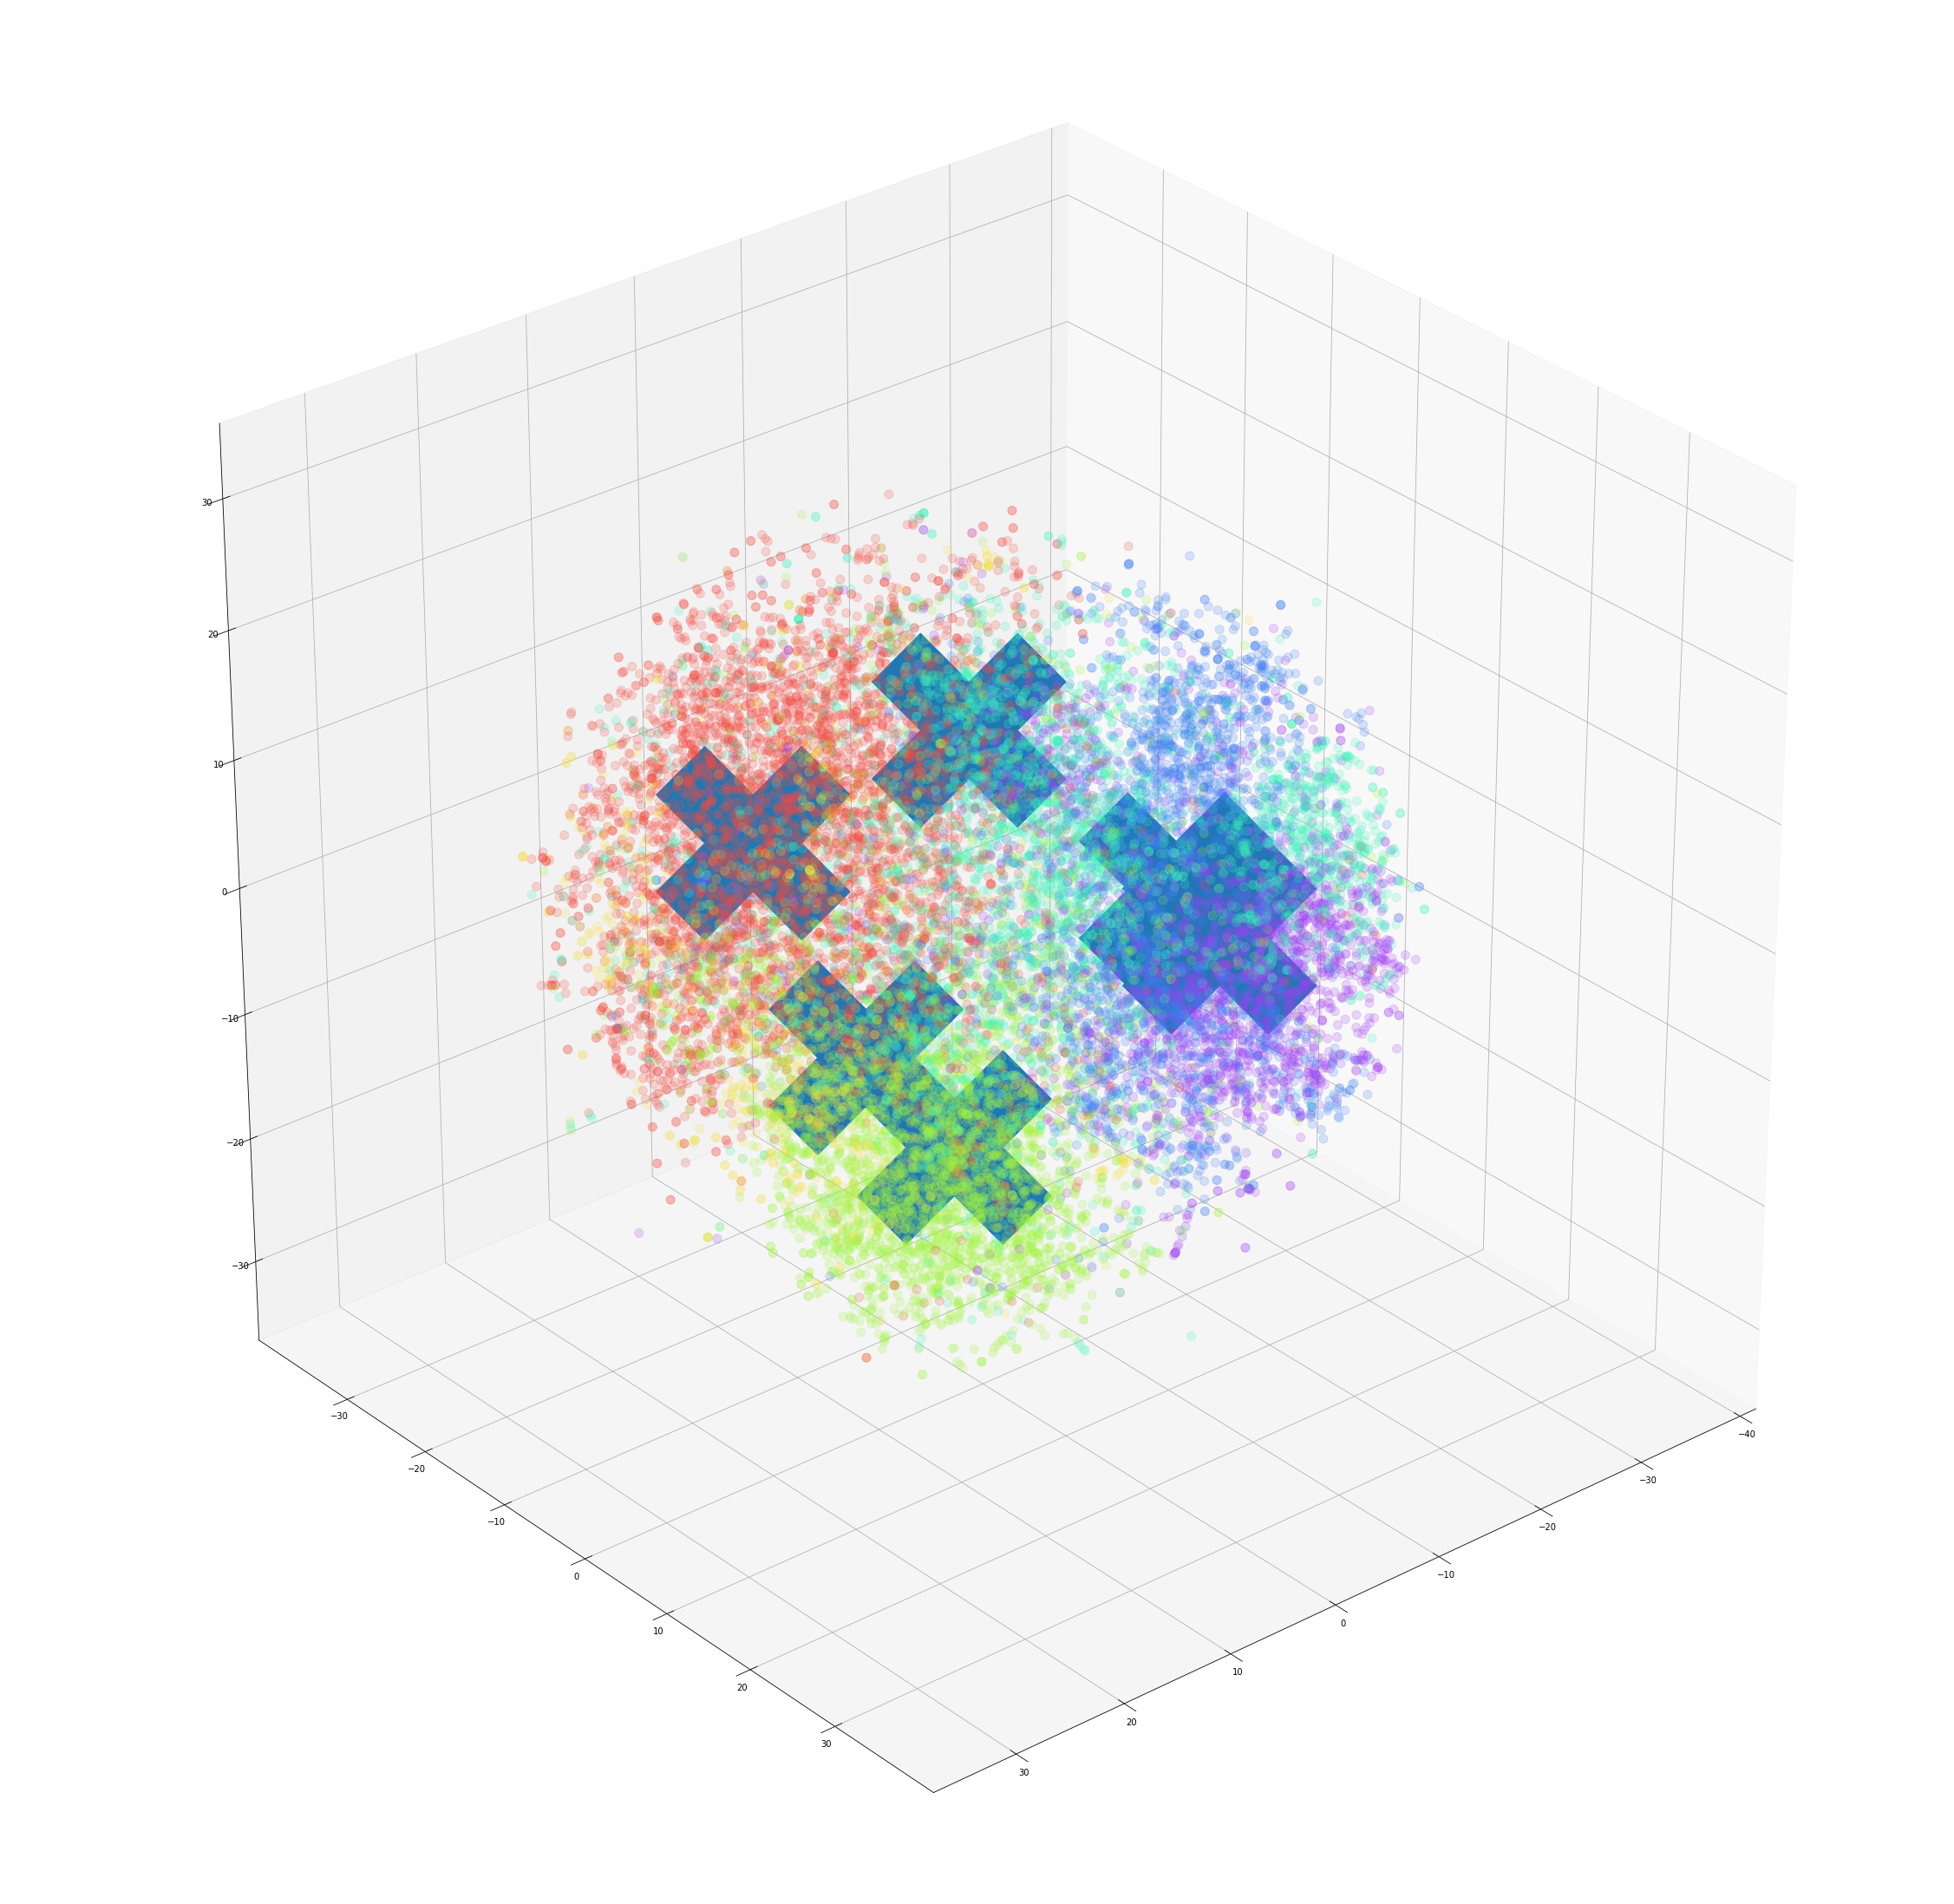

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
#fig = plt.figure()
fig =plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:,1], X_tsne[:,2], 
           s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.2)
ax.scatter(kMeanCentersD2V[:, 0],kMeanCentersD2V[:, 1],kMeanCentersD2V[:, 2],marker='X',s=50000,alpha=1)
ax.view_init(30, 50)

In [49]:
a = kmeans.predict(X_doc2vec)

In [50]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.32704750157085316